# Simulation of Sequences

Link: [here](https://pulser.readthedocs.io/en/stable/tutorials/simulating.html)

Now that we have learned how to manipulate our lattice of atoms, we have to learn how to use it to obtain a solution to a given problem

The idea is that: 
- The qubits are the number of "varibales" (**components**) in our problem (information given by `Register` object)
- the sequence (with the corresponding pulses, i.e. operations to the qubits) are the **problem Hamiltonian** (information given by `Pulse` and `Sequence` objects)

and, we need, for example, to find the state described by this Hamiltonian (e.g. its **ground state**)

To obtain that state, we have to:
- make it evolve (apply the Hamiltonian, so apply `Sequence` with `Pulse`s)
- perform a **measurement** (`sequence.measurement(basis_type)`)

But, as we know, only a measurement is not enough to establish the nature of the final state, due to the instrinsic probabilistic nature of quantum mechanics

So, we can only obtain the *most probable* state, by performing N-times the procedure of evolution and measurement (so obtain N classical outputs) and then do a classical average on the outcomes, i.e. perform a **Sampling**

In Pulser, that is performed via the `Simulation` object

NOTE: it is called *Simulation* because it's a (classical) simulation, i.e. it obtains classical outputs and returns the (classical) most probable state

In [21]:
from pulser import Pulse, Sequence, Register
from pulser.simulation import Simulation
from pulser.waveforms import BlackmanWaveform, RampWaveform
from pulser.devices import MockDevice

import numpy as np
import qutip
import matplotlib.pyplot as plt

To illustrate the simulation of sequences, let us study a simple one-dimensional system with periodic boundary conditions (a ring of atoms):

So:

- our system of qubits (the components of our system) is defined by the `Register`:

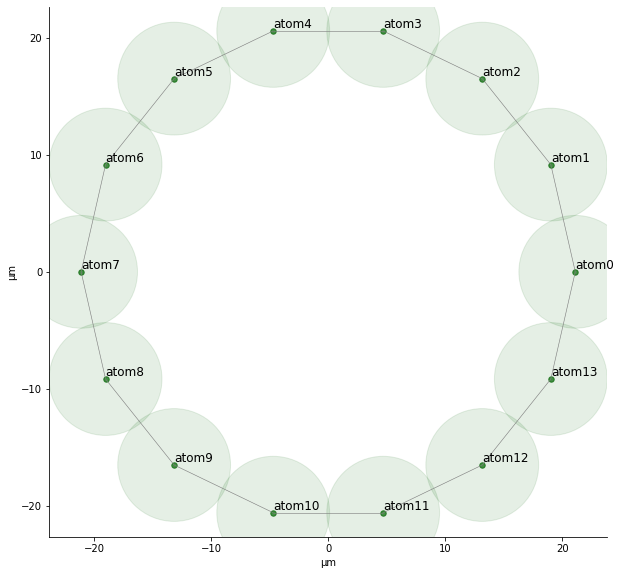

In [22]:
# Setup
L = 14

Omega_max = 2.3 * 2*np.pi
U = Omega_max / 2.3

delta_0 = -3 * U
delta_f = 1 * U

t_rise = 2000
t_fall = 2000
t_sweep = (delta_f - delta_0)/(2 * np.pi * 10) * 5000

# Define a ring of atoms distanced by a blockade radius distance:
R_interatomic = MockDevice.rydberg_blockade_radius(U)
coords = R_interatomic/(2*np.tan(np.pi/L)) * np.array([(np.cos(theta*2*np.pi/L), np.sin(theta*2*np.pi/L)) for theta in range(L)])

reg = Register.from_coordinates(coords, prefix='atom')

reg.draw(blockade_radius=R_interatomic,
         draw_half_radius = True,
         draw_graph = True)

- The Hamiltonian which put them in an *antiferromagnetic order*, described by the `Sequence` (which contain the `pulse`s):

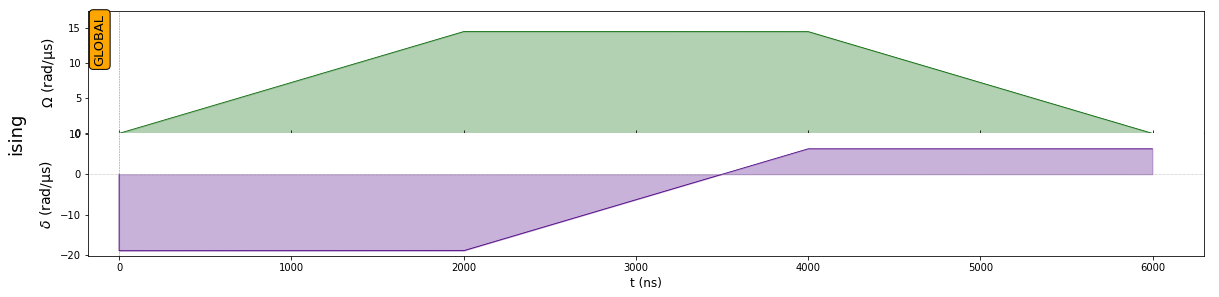

In [23]:
rise = Pulse.ConstantDetuning(RampWaveform(t_rise, 0., Omega_max), delta_0, 0.)
sweep = Pulse.ConstantAmplitude(Omega_max, RampWaveform(t_sweep, delta_0, delta_f), 0.)
fall = Pulse.ConstantDetuning(RampWaveform(t_fall, Omega_max, 0.), delta_f, 0.)

seq = Sequence(reg, MockDevice)
seq.declare_channel('ising', 'rydberg_global')

seq.add(rise, 'ising')
seq.add(sweep, 'ising')
seq.add(fall, 'ising')

seq.draw()

## Running a Simulation

Now that we have defined the system and the Hamiltonian (through `sequence(register, device)` and `seq.add(pulse)`), we define the `Simulation` object, which contains the informations already stored in the `Sequence` object

In [24]:
sim = Simulation(seq, sampling_rate=0.1)

In [15]:
sim_1 = Simulation(seq, sampling_rate=0.5)

In [19]:
sim.evaluation_times

'Full'

In [17]:
sim_1.evaluation_times

'Full'

NOTE: the

In [43]:
sim.config

SimConfig(noise=(), runs=15, samples_per_run=5, temperature=4.9999999999999996e-05, laser_waist=175.0, eta=0.005, epsilon=0.01, epsilon_prime=0.05, dephasing_prob=0.05, solver_options=None, doppler_sigma=0.600149981254686)

In [47]:
sim_1.config

SimConfig(noise=(), runs=15, samples_per_run=5, temperature=4.9999999999999996e-05, laser_waist=175.0, eta=0.005, epsilon=0.01, epsilon_prime=0.05, dephasing_prob=0.05, solver_options=None, doppler_sigma=0.600149981254686)

In [44]:
sim.show_config()

Options:
----------
Number of runs:        15
Samples per run:       5


In [48]:
sim_1.show_config()

Options:
----------
Number of runs:        15
Samples per run:       5


In [34]:
sim.initial_state

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (16384, 1), type = ket
Qobj data =
  (16383, 0)	(1+0j)

In [35]:
2**14

16384

In [36]:
sim.evaluation_times

'Full'

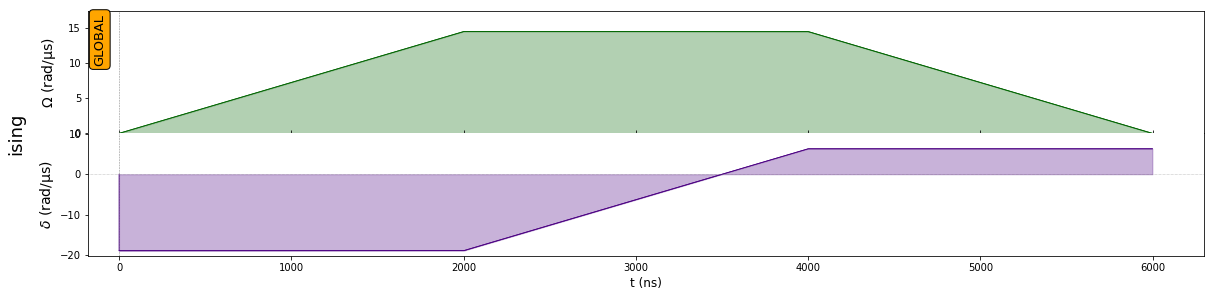

In [37]:
sim.draw()

In [39]:
sim.get_hamiltonian(0.)

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (16384, 16384), type = oper, isherm = True
Qobj data =
  (0, 0)	(368.5087200038721+0j)
  (1, 1)	(334.7141730677148+0j)
  (2, 2)	(334.71417306771497+0j)
  (3, 3)	(308.23682471877623+0j)
  (4, 4)	(334.7141730677148+0j)
  (5, 5)	(301.0527726581281+0j)
  (6, 6)	(308.23682471877623+0j)
  (7, 7)	(281.89262289640806+0j)
  (8, 8)	(334.7141730677147+0j)
  (9, 9)	(300.9347475997554+0j)
  (10, 10)	(301.05277265812816+0j)
  (11, 11)	(274.5905457773874+0j)
  (12, 12)	(308.2368247187762+0j)
  (13, 13)	(274.5905457773874+0j)
  (14, 14)	(281.89262289640817+0j)
  (15, 15)	(255.56354254223788+0j)
  (16, 16)	(334.7141730677148+0j)
  (17, 17)	(300.9235156081276+0j)
  (18, 18)	(300.9347475997556+0j)
  (19, 19)	(274.461288727387+0j)
  (20, 20)	(301.05277265812805+0j)
  (21, 21)	(267.3952617251114+0j)
  (22, 22)	(274.59054577738743+0j)
  (23, 23)	(248.25023343158935+0j)
  (24, 24)	(308.236

Now that we have all the information for the procedure, we make the simulation perform the sequence instructions, and obtain a `pulser.simulation.simresults.CoherentResults` object (coherent because it's without noise)

it contains the information of the procedure (for example it's attribute `results.states` is a list of the states of the system at given times during the evolution)

NOTE: ideally it would be a continuos distribution of states (i.e. separated by infinitesimal tipe steps), but of course it's impossible in computation and the time-steps after which each state is evaluated in the `sim.run` operation gives the *resolution* of the system evolution and that is dictated by the `sampling_rate` argument in the `simulation` object (where `1` is the ighest resolution)

In [25]:
results = sim.run(progress_bar=True)

10.0%. Run time:   1.23s. Est. time left: 00:00:00:11
20.0%. Run time:   2.39s. Est. time left: 00:00:00:09
30.0%. Run time:   3.83s. Est. time left: 00:00:00:08
40.0%. Run time:   5.79s. Est. time left: 00:00:00:08
50.0%. Run time:   7.84s. Est. time left: 00:00:00:07
60.0%. Run time:  10.13s. Est. time left: 00:00:00:06
70.0%. Run time:  12.65s. Est. time left: 00:00:00:05
80.0%. Run time:  15.09s. Est. time left: 00:00:00:03
90.0%. Run time:  17.32s. Est. time left: 00:00:00:01
Total run time:  19.24s


In [51]:
results_1 = sim_1.run(progress_bar=True)

10.0%. Run time:   3.84s. Est. time left: 00:00:00:34
20.0%. Run time:   7.92s. Est. time left: 00:00:00:31
30.0%. Run time:  13.20s. Est. time left: 00:00:00:30
40.0%. Run time:  19.31s. Est. time left: 00:00:00:28
50.0%. Run time:  26.11s. Est. time left: 00:00:00:26
60.0%. Run time:  33.93s. Est. time left: 00:00:00:22
70.0%. Run time:  43.68s. Est. time left: 00:00:00:18
80.0%. Run time:  52.86s. Est. time left: 00:00:00:13
90.0%. Run time:  60.99s. Est. time left: 00:00:00:06
Total run time:  69.61s


In [57]:
len(results.states)

600

In [58]:
len(results_1.states)

3000

In [59]:
type(results)

pulser.simulation.simresults.CoherentResults

In [60]:
results

In [71]:
results.get_final_state()

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (16384, 1), type = ket
Qobj data =
  (0, 0)	(-1.8214801232716247e-07-2.4508488651338684e-08j)
  (1, 0)	(3.931022192217505e-08+1.3293740612205125e-06j)
  (2, 0)	(3.931022190454861e-08+1.3293740612207063e-06j)
  (3, 0)	(-2.1079711805820618e-07-1.7305280404798241e-06j)
  (4, 0)	(3.931022191333393e-08+1.3293740612107729e-06j)
  (5, 0)	(1.0189056027369457e-05+1.5848164306446185e-06j)
  (6, 0)	(-2.1079711803025992e-07-1.7305280404640833e-06j)
  (7, 0)	(-2.165814593357853e-07+2.004199746180972e-06j)
  (8, 0)	(3.9310221889599536e-08+1.3293740612008406e-06j)
  (9, 0)	(1.0832599567574598e-05-3.1555899730356904e-06j)
  (10, 0)	(1.0189056027380377e-05+1.5848164306737691e-06j)
  (11, 0)	(-1.4020619782200774e-05+2.1451385580401234e-08j)
  (12, 0)	(-2.1079711805631973e-07-1.7305280404689169e-06j)
  (13, 0)	(-1.4020619782208352e-05+2.1451385578246383e-08j)
  (14, 0)	(-2.165814593492

To see the configuration encoded in the final state, we have 

<BarContainer object of 35 artists>

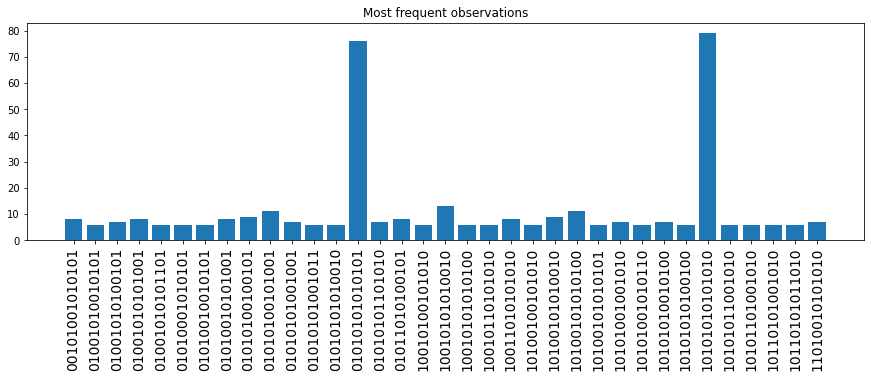

In [26]:
counts = results.sample_final_state(N_samples=1000)

large_counts = {k:v for k,v in counts.items() if v > 5}

plt.figure(figsize=(15,4))
plt.xticks(rotation=90, fontsize=14)
plt.title("Most frequent observations")
plt.bar(large_counts.keys(), large_counts.values())

In [78]:
results.states[0] == sim.initial_state

True

In [80]:
a = np.kron([1,0], [1,0])

In [81]:
a

array([1, 0, 0, 0])

## Expectation value of operators

In quantum mechanics, the expectation value is the probabilistic expected value of the result (measurement) of an experiment. It can be thought of as an average of all the possible outcomes of a measurement as weighted by their likelihood, and as such it is not the most probable value of a measurement; indeed the expectation value may have zero probability of occurring (e.g. measurements which can only yield integer values may have a non-integer mean). It is a fundamental concept in all areas of quantum physics. 

To relate a quantum mechanical calculation to something you can observe in the laboratory, the "expectation value" of the measurable parameter is calculated.

Given an operator $\hat{O}$, it's expectation value is given by the projection of the operator on the system described by the wavefunction/ket state $|\phi\rangle$ which describe the system

$$ \langle \hat{O} \rangle  = \langle \phi | \hat{O} | \phi \rangle$$ 

In [27]:
def magnetization(j, total_sites):
    prod = [qutip.qeye(2) for _ in range(total_sites)] # qeye(n) = nxn identity matrix (here, because an index wasn't necessary in the for loop, it was used the "_" symbol)
    prod[j] = qutip.sigmaz()                           # sigmaz() is the 2-D operator Z
    return qutip.tensor(prod)                          # tensor(ordered container) returns a quantum object which is the tensor product of the (same-dimension) elements (quantObjs) of the container 

magn_list = [magnetization(j, L) for j in range(L)]

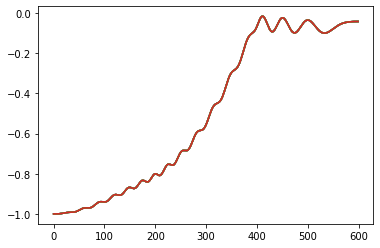

In [36]:
expect_magnetization = results.expect(magn_list)
times = np.arange(len(results.states))
for data in expect_magnetization:
    plt.plot(times, data)

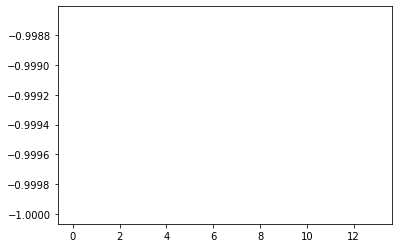

In [32]:
expect_magnetization = results.expect(magn_list) # evaluate the exp. value of the operator for each state (ket-vecotr qObj) in the results simulation object
i = 0
for data in expect_magnetization:
    plt.plot(i, data[i])
    i += 1

In [31]:
expect_magnetization[1]

array([-1.        , -0.99999993, -0.99999896, -0.9999948 , -0.99998379,
       -0.99996113, -0.99992115, -0.99985766, -0.99976436, -0.9996352 ,
       -0.99946486, -0.99924907, -0.99898498, -0.99867147, -0.99830929,
       -0.99790127, -0.99745223, -0.99696897, -0.99646003, -0.99593544,
       -0.99540626, -0.9948842 , -0.99438104, -0.99390813, -0.99347577,
       -0.9930927 , -0.99276559, -0.99249857, -0.99229293, -0.99214683,
       -0.99205521, -0.99200982, -0.99199934, -0.99200971, -0.99202458,
       -0.99202583, -0.99199428, -0.99191041, -0.99175518, -0.99151084,
       -0.99116175, -0.99069513, -0.99010176, -0.98937653, -0.9885189 ,
       -0.98753306, -0.9864281 , -0.98521779, -0.98392027, -0.98255751,
       -0.98115451, -0.97973858, -0.97833822, -0.97698208, -0.97569776,
       -0.97451087, -0.97344335, -0.97251301, -0.97173242, -0.97110819,
       -0.9706405 , -0.97032282, -0.97014187, -0.97007795, -0.97010549,
       -0.97019386, -0.97030846, -0.9704203 , -0.97046721, -0.97